In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("F:\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

dataset has 1470 rows 35 columns

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The features 'Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime',over18 are object type remainiong all are integer type

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

dataset has no null values

displaying value count of unique value in each feature.To identify coloums having single unique value

In [6]:
df['StandardHours'].unique

<bound method Series.unique of 0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64>

In [7]:
df['EmployeeCount'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64>

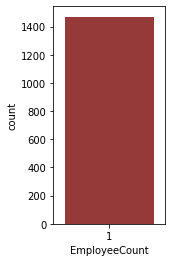

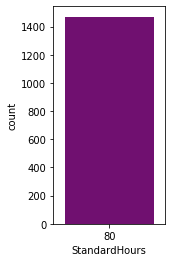

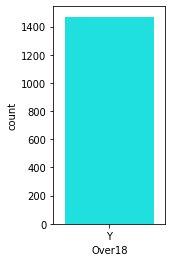

In [8]:
plt.figure(figsize=(2,4))
sns.countplot(df.EmployeeCount,color="brown")

plt.figure(figsize=(2,4))
sns.countplot(df.StandardHours,color="purple")

plt.figure(figsize=(2,4))
sns.countplot(df.Over18,color=(0,1,1))

The features standardhours,over18 and employeecount has only one value so it wont create any impact on the target feature Attrition.

In [9]:
cols=['StandardHours','Over18','EmployeeCount']
df_new=df.drop(cols,axis=1)

All the three columns having single value so I'm dropping it from the given dataset

In [10]:
df_new.shape

(1470, 32)

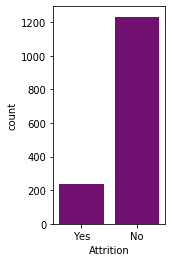

In [11]:
plt.figure(figsize=(2,4))
sns.countplot(df.Attrition,color="purple")

the target coloumn attrition has two values 0 and 1.It has class imbalance

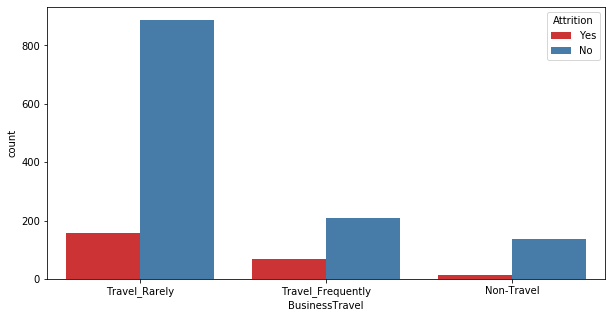

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(df.BusinessTravel,palette="Set1",hue=df.Attrition)

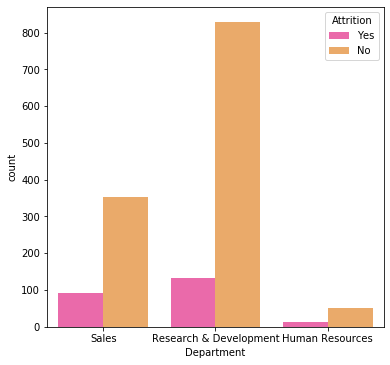

In [13]:
plt.figure(figsize=(35,20))
rows = 3
cols = 5
i=0
i+=1
plt.subplot(rows,cols,i)
sns.countplot(df.Department,palette="spring",hue=df.Attrition)

from the above plot its apparent that comparitively the employees who belongs to Research and Developement will like to continue their job

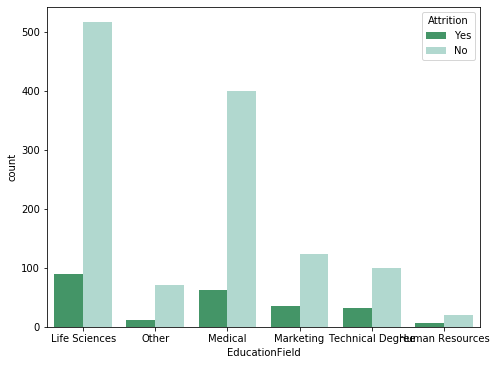

In [14]:
plt.figure(figsize=(45,20))
rows = 3
cols = 5
i=0
color_l=['cyan','green','yellow','blue','purple','orange']
i+=1
plt.subplot(rows,cols,i)
sns.countplot(df['EducationField'],palette="BuGn_r",hue=df.Attrition)

from the above plot its apparent that comparitively the employees who belongs to both lifesciece and medical field are not resigning their job.

In [15]:
print(df['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


most of the employees belongs to life science education field and medical field

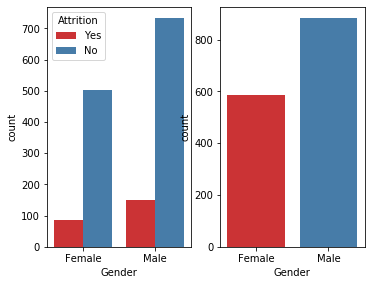

In [16]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.Gender,palette="Set1",hue=df.Attrition)

i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.Gender,palette="Set1")

comparing the percentage of attrition out of 588 female only 88 people are quitting

[Text(0, 0, 'Sales Executive'),
 Text(0, 0, 'Research Scientist'),
 Text(0, 0, 'Laboratory Technician'),
 Text(0, 0, 'Manufacturing Director'),
 Text(0, 0, 'Healthcare Representative'),
 Text(0, 0, 'Manager'),
 Text(0, 0, 'Sales Representative'),
 Text(0, 0, 'Research Director'),
 Text(0, 0, 'Human Resources')]

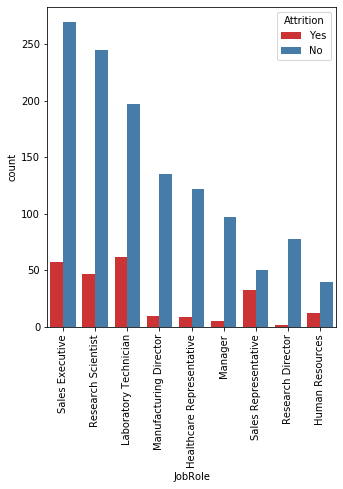

In [17]:
plt.figure(figsize=(30,20))
rows = 3
cols = 5
i=0
color_l=['brown','blue','salmon','purple','pink','orange','salmon','red']
i+=1
plt.subplot(rows,cols,i)
l = list(df['JobRole'].unique())
chart = sns.countplot(df["JobRole"],palette="Set1",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

Attrition rate is lower in sales executive and research scientist roles

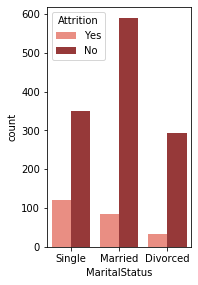

In [18]:
color_l=['salmon','brown','purple']
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.MaritalStatus,palette=color_l,hue=df.Attrition)

From this above chart its apparent that employees who all are married are having less attrition rate

No     1054
Yes     416
Name: OverTime, dtype: int64


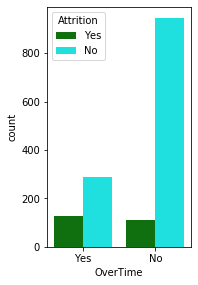

In [19]:
color_l=['green','cyan','blue']
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.OverTime,palette=color_l,hue=df.Attrition)

print(df['OverTime'].value_counts())

Employees who all are not working overtime has low attrition rate

28.3% employees are willing to work in overtime

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


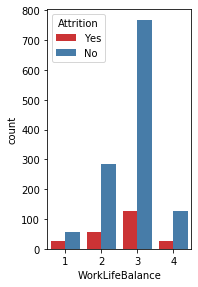

In [20]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.WorkLifeBalance,palette="Set1",hue=df.Attrition)

print(df['WorkLifeBalance'].value_counts())

from the above chart its apparent that the employees who all are having above average worklife balance are having less attrition rate

[Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '1')]

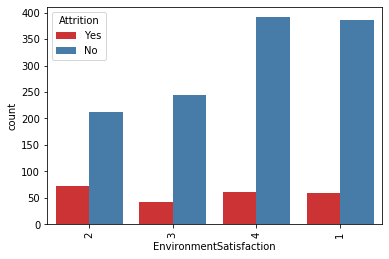

In [21]:
l = list(df['EnvironmentSatisfaction'].unique())
chart = sns.countplot(df["EnvironmentSatisfaction"],palette="Set1",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that both the employee who having high satisfaction and low satisfaction are having low Attrition rate.so we cannot predict the target coloumn with this value

[Text(0, 0, '3'), Text(0, 0, '2'), Text(0, 0, '4'), Text(0, 0, '1')]

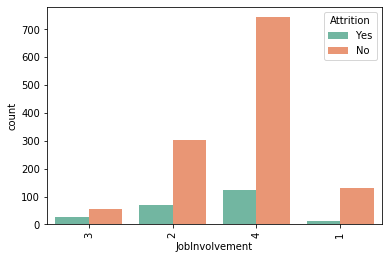

In [22]:
l = list(df['JobInvolvement'].unique())
chart = sns.countplot(df["JobInvolvement"],palette="Set2",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that the employee who all are highly involved in the job having low Attrition rate

[Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

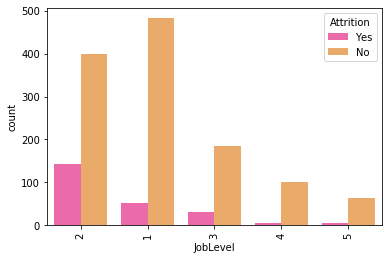

In [23]:
l = list(df['JobLevel'].unique())
chart = sns.countplot(df["JobLevel"],palette="spring",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that the entry level employees are having low Attrition rate.

[Text(0, 0, '4'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '1')]

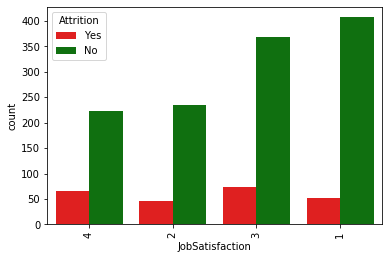

In [24]:
l = list(df['JobSatisfaction'].unique())
col_l=["red","green"]
chart = sns.countplot(df["JobSatisfaction"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

[Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '6')]

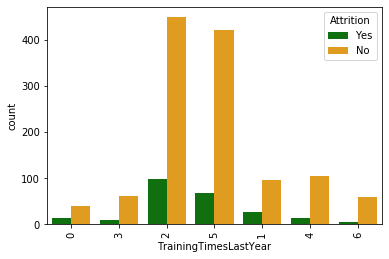

In [25]:
l = list(df['TrainingTimesLastYear'].unique())
col_l=["green","orange"]
chart = sns.countplot(df["TrainingTimesLastYear"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

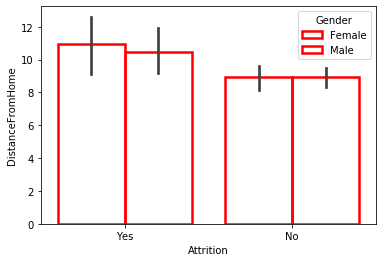

In [26]:
sns.barplot(df['Attrition'],df['DistanceFromHome'],linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor="red",hue=df.Gender)

Distance from home is not an important feature to create impact on Attrition feature.Distance from home is not impact on gender

In [27]:
df['MonthlyRate'].value_counts()

4223     3
9150     3
6670     2
7324     2
4658     2
        ..
11585    1
15682    1
3395     1
9541     1
8192     1
Name: MonthlyRate, Length: 1427, dtype: int64

Handling Outliers

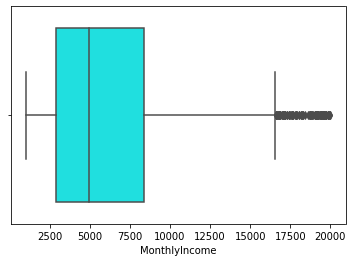

In [28]:
sns.boxplot(df['MonthlyIncome'],color="cyan")

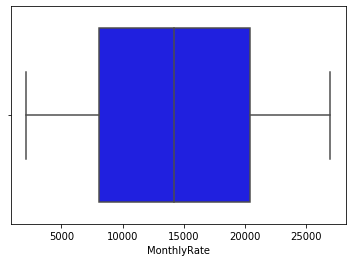

In [29]:
sns.boxplot(df['MonthlyRate'],color="blue")

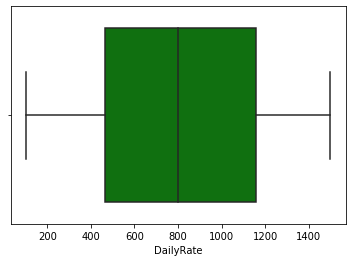

In [30]:
sns.boxplot(df['DailyRate'],color="green")

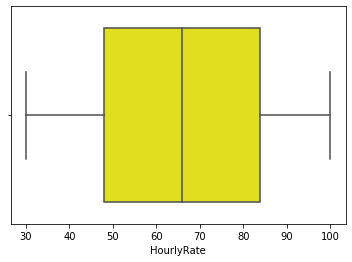

In [31]:
sns.boxplot(df['HourlyRate'],color="yellow")

In [32]:
z1 = np.abs(stats.zscore(df_new['MonthlyIncome']))
print(z1)

[0.10834951 0.29171859 0.93765369 ... 0.07669019 0.23647414 0.44597809]


In [33]:
df_new['MonthlyIncome'] = df_new.MonthlyIncome[(z1<3)]
df_new.shape

(1470, 32)

outliers are removed from numerical data monthly income

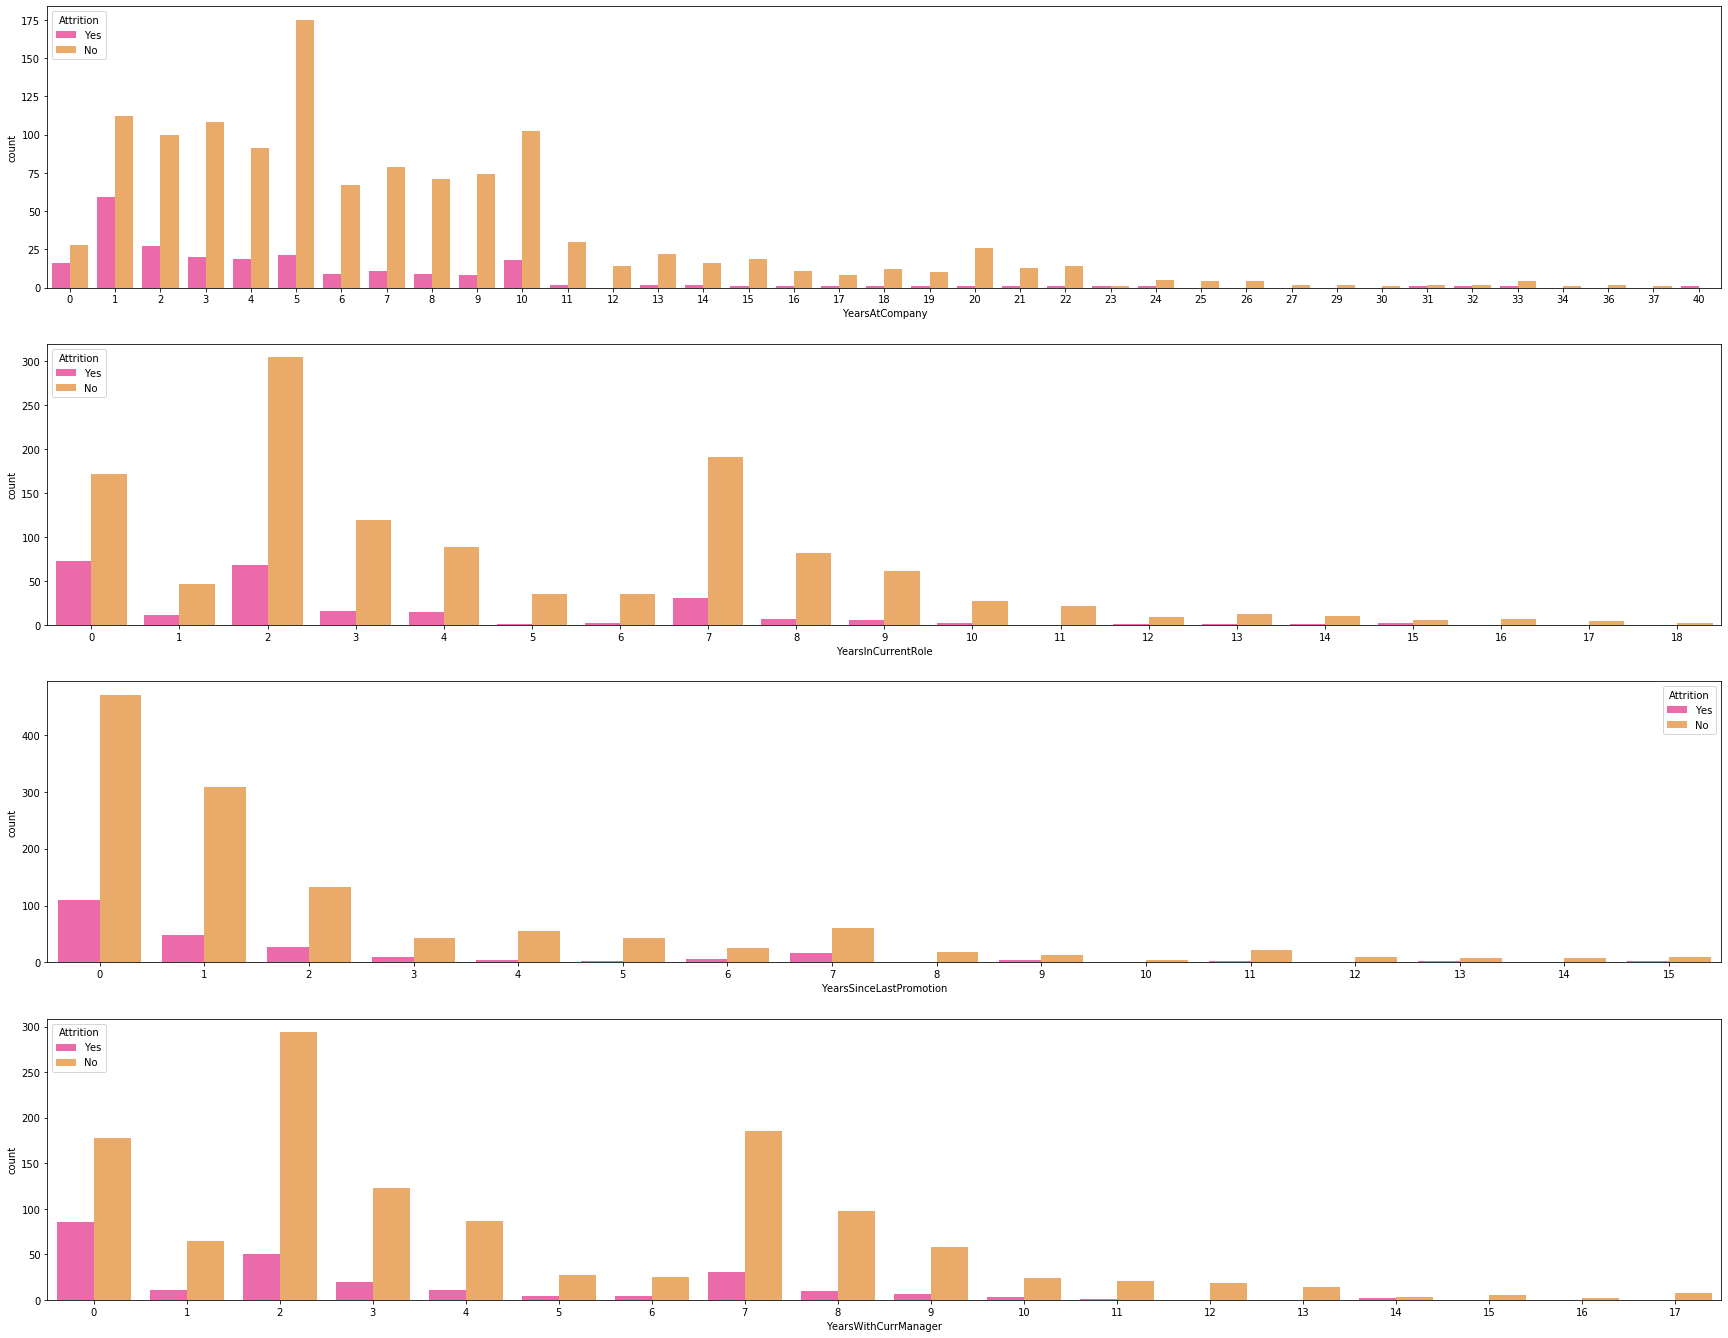

In [34]:
l =['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
ncol=1
nrows=5
plt.figure(figsize=(30,30))
for i in range(0,4):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=l[i],data=df,palette="spring",hue=df.Attrition)

if the employee is in their 5th year with company with same manager are not quitting the job

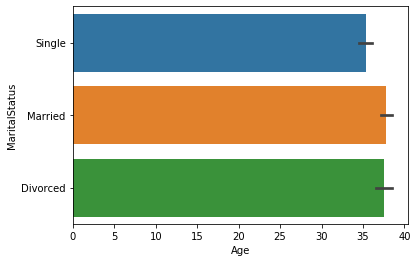

In [35]:
sns.barplot(df["Age"],df['MaritalStatus'])

employees who belongs to below category having less attrition rate

travel rarely,R&D department,who belongs to lifescience and medical field,female,sales executive and research scientists,married,not working over time,moderate work life balance,high job involvement,working in single company,performance rating:3 and employees who having no or less stocks,low monthly income.

we cannot predict using relationship satisfaction,job satisfaction,Environment satisfaction features

Encoding all categorical coloumn into numerical column using label encoding technique

In [36]:
data_clean=df_new
col_encod=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [37]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_clean[col]= label.fit_transform(df_new[col])

In [38]:
data_clean.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


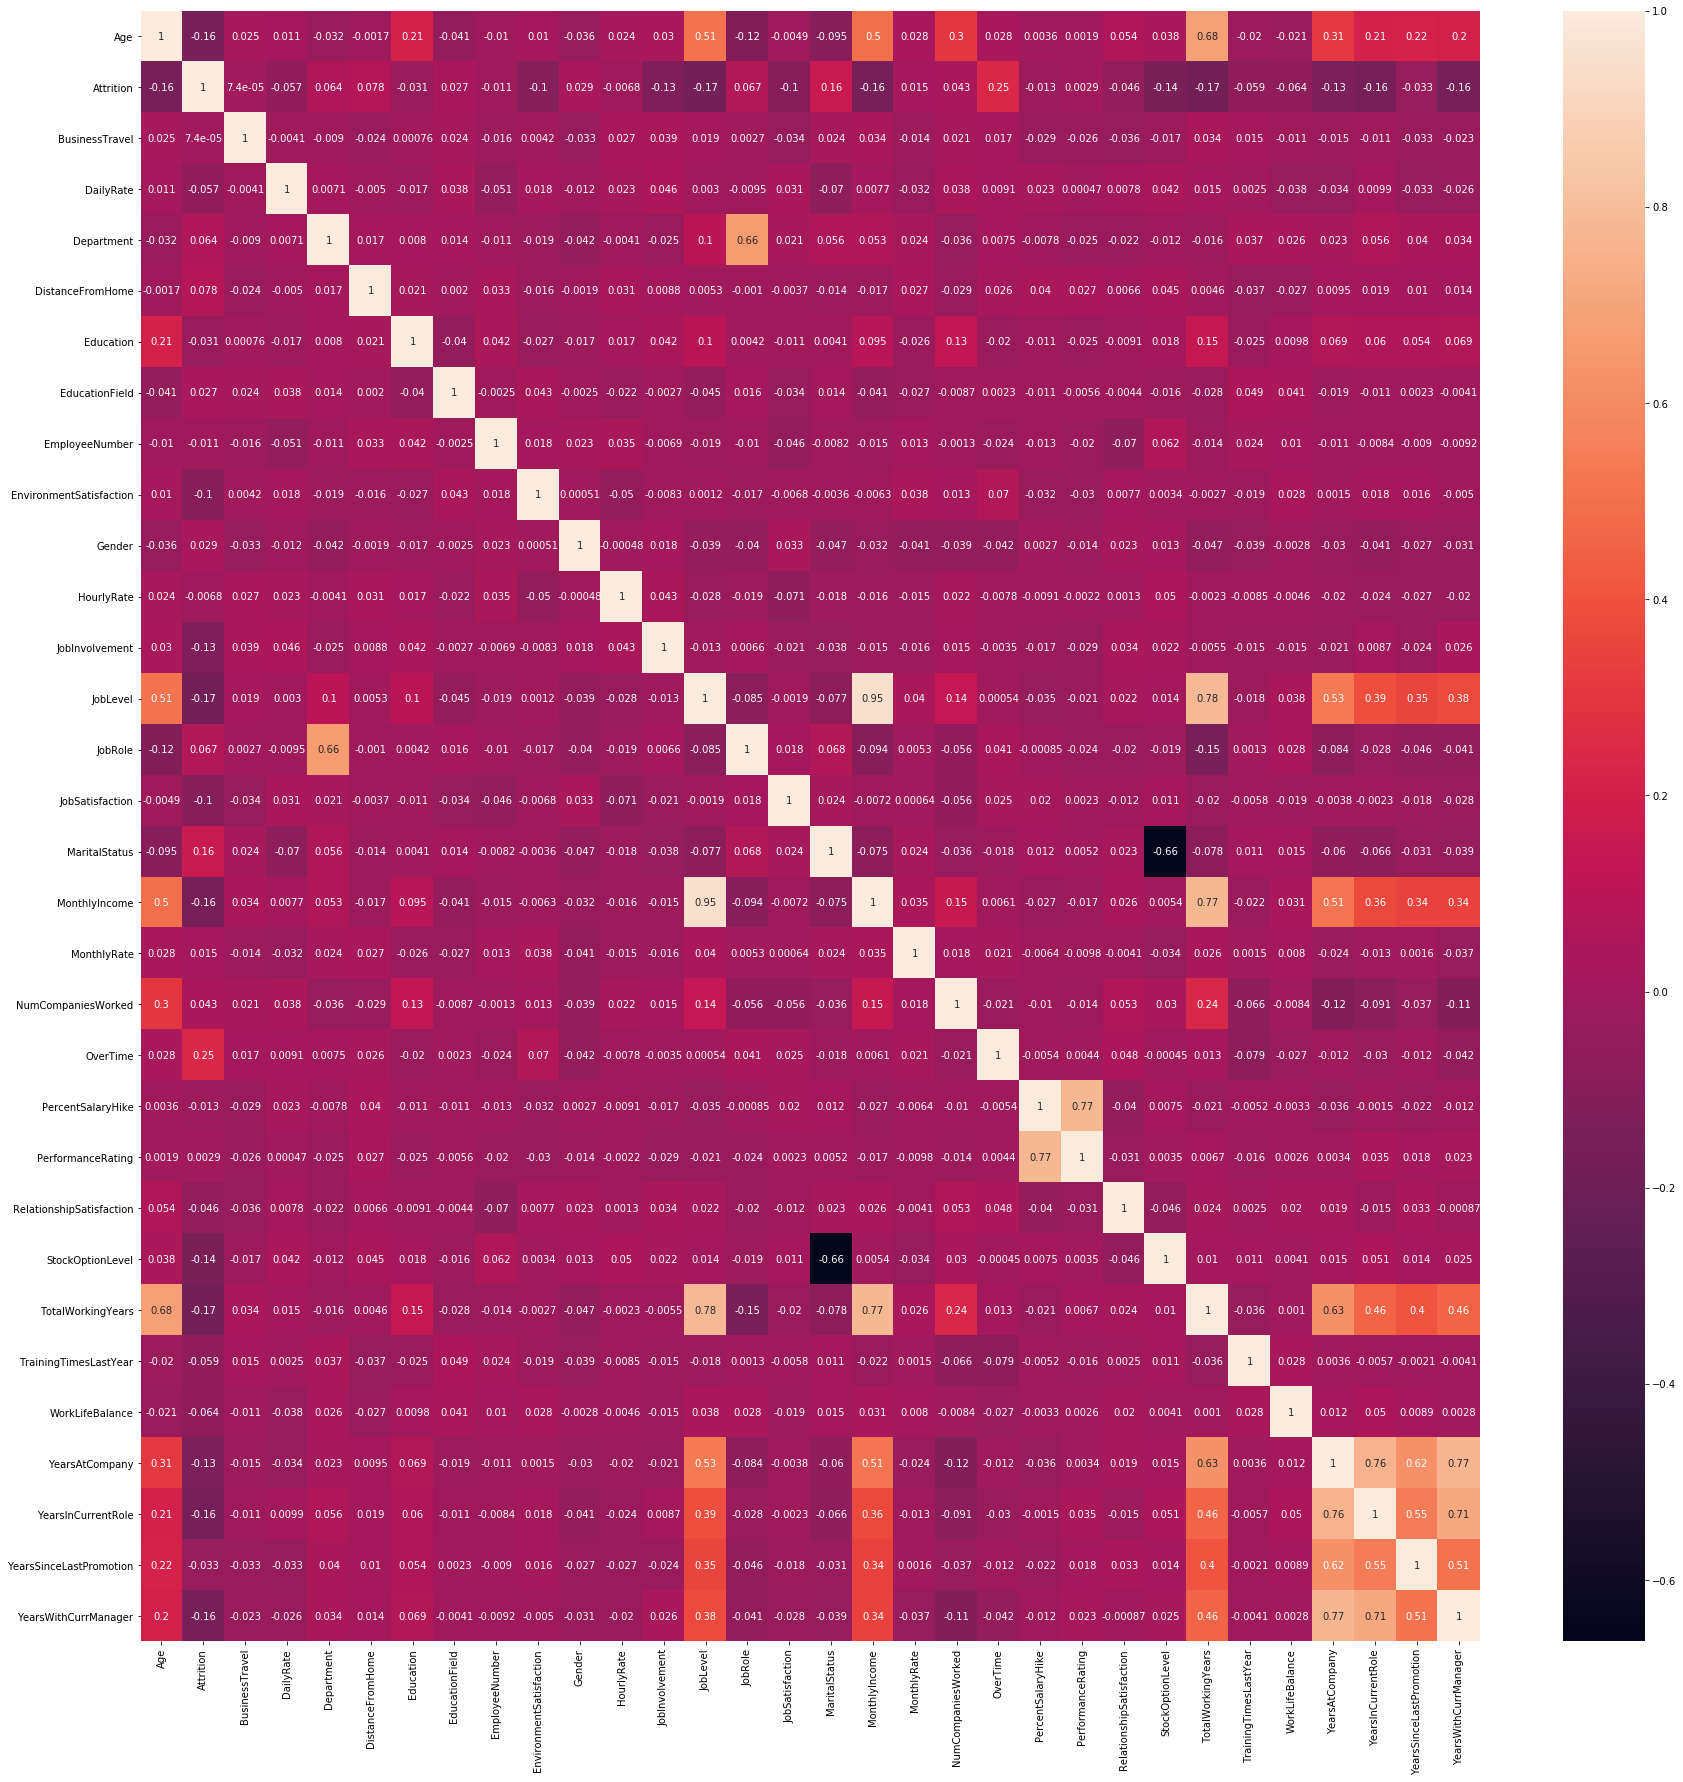

In [39]:
correlation=data_clean.corr(method='pearson')
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)

In [40]:
data_clean.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [41]:
from sklearn.preprocessing import power_transform
x = power_transform(data_clean,method='yeo-johnson')

We can check that out imput dataset X is having some skewness so we used yeo-johnson method to remove the skewness from our dataset

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

As we have checked earlier our dataset having class imbalancing so we are using standard scaler to balance the dataset before initializing building of our model.

In [43]:
x1=data_clean.drop('Attrition',axis=1)
y1=data_clean['Attrition']

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [47]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

LogisticRegression() 

Accuracy score: 0.8586956521739131 

"Confusion Matrix:
" [[297   3]
 [ 49  19]]
classification_report
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       300
           1       0.86      0.28      0.42        68

    accuracy                           0.86       368
   macro avg       0.86      0.63      0.67       368
weighted avg       0.86      0.86      0.83       368

Average accuracy_score 0.8586956521739131
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8342391304347826 

"Confusion Matrix:
" [[296   4]
 [ 57  11]]
classification_report
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       300
           1       0.73      0.16      0.27        68

    accuracy                           0.83       368
   macro avg       0.79      0.57      0.59      

No Skill: ROC AUC=0.500
model: ROC AUC=0.567


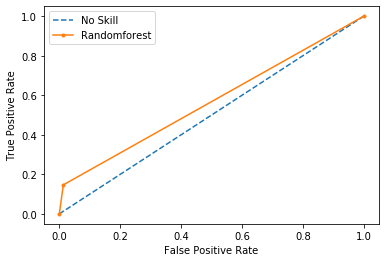

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
m=RandomForestClassifier()
m.fit(xtrain,ytrain)
p=m.predict(xtest)
ns_probs = [0 for _ in range(len(ytest))]
m_probs = p
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Randomforest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [49]:
scorel=[]

In [50]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.87755102, 0.86734694, 0.86054422, 0.8707483 , 0.87755102])

In [51]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.8537415 , 0.85714286, 0.86054422, 0.86054422, 0.85714286])

In [52]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.83673469, 0.83673469, 0.8537415 , 0.85034014, 0.84693878])

In [53]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.84693878, 0.87414966, 0.87414966, 0.85714286, 0.86054422])

In [54]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.7755102 , 0.78911565, 0.82312925, 0.76870748, 0.77891156])

Difference of predicted model and crossvalidation score

In [55]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,5):
    print(models[i],"difference is",scorel[i]-acclist[i])

LogisticRegression() difference is [0.01885537 0.00865129 0.00184857 0.01205265 0.01885537]
RandomForestClassifier() difference is [0.01950237 0.02290373 0.02630509 0.02630509 0.02290373]
KNeighborsClassifier() difference is [0.00521295 0.00521295 0.02221976 0.0188184  0.01541704]
GradientBoostingClassifier() difference is [0.01813443 0.04534531 0.04534531 0.02833851 0.03173987]
DecisionTreeClassifier() difference is [0.02279281 0.03639825 0.07041186 0.01599009 0.02619417]


from the observation KNeighborsClassifier() has least difference so I'm selecting KNeighborsClassifier()as best model

Hyper Tuning

In [56]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
                'p':[1,2],'leaf_size':list(range(1,20))

}

gs2 = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Fitting 3 folds for each of 1368 candidates, totalling 4104 fits
Best param: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25)
model =KNeighborsClassifier(metric='minkowski', n_neighbors=5,weights='distance',p=1,leaf_size=1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8505434782608695

In [58]:
y_pred_1 = model.predict(x_test)

In [59]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[306   1]
 [ 54   7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       307
           1       0.88      0.11      0.20        61

    accuracy                           0.85       368
   macro avg       0.86      0.56      0.56       368
weighted avg       0.85      0.85      0.80       368

Accuracy: 0.8505434782608695


# Accuracy: 0.8586956521739131

final model after hyper tuning with accuracy 0.8586956521739131 Best model:KNeighbourClassifier Best param: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


ROC AUC CURVE

No Skill: ROC AUC=0.500
model: ROC AUC=0.557


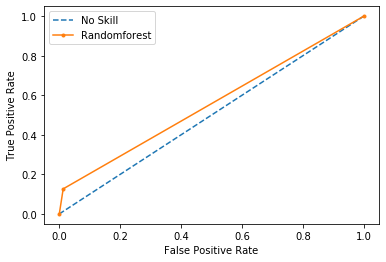

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.26,random_state=1)
m=KNeighborsClassifier(metric='minkowski', n_neighbors=5,weights='distance',p=1,leaf_size=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
ns_probs = [0 for _ in range(len(ytest))]
m_probs = p
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Randomforest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [61]:
from joblib import dump
dump(model, 'model_hr.joblib')

['model_hr.joblib']

In [62]:
from joblib import load
loaded = load('model_hr.joblib')